# Import libs

In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from sklearn.metrics import classification_report

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [13]:
X_train[0].shape

(28, 28)

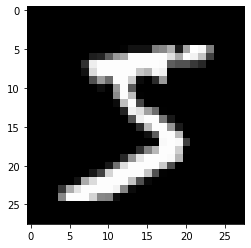

In [25]:
plt.imshow(X_train[0], cmap='gray')

# Util function
Display the image & its label

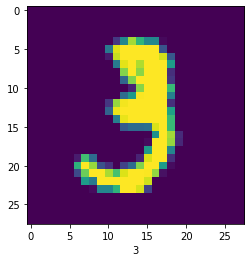

In [34]:
def plot_image(X,y,index):
    plt.imshow(X[index])
    plt.xlabel(y[index])
    
plot_image(X_train, y_train, 10)

# Preprocessing
Scale X data 

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# CNN model - Build, compile, Fit, Evaluate

In [28]:
model = keras.Sequential([
    
    #cnn
    keras.layers.Conv1D(filters=28, kernel_size=(3),input_shape=(28,28), activation="relu"),
    keras.layers.MaxPool1D(pool_size=(2)),
    
    keras.layers.Conv1D(filters=28, kernel_size=(3), activation="relu"),
    keras.layers.MaxPool1D(pool_size=(2)),
    
    #dense
    keras.layers.Flatten(),
    keras.layers.Dense(56, activation="relu"),
    keras.layers.Dense(10, activation="softmax")    
])

model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2789 - accuracy: 0.9174
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1000 - accuracy: 0.9699
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0730 - accuracy: 0.9773
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0595 - accuracy: 0.9817
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0484 - accuracy: 0.9850
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0421 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0368 - accuracy: 0.9882
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0318 - accuracy: 0.9897
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0294 - accuracy: 0.9902
Epoch 10/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0

In [29]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0418 - accuracy: 0.9876


[0.041791029274463654, 0.9876000285148621]

In [30]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[1.0451837e-10, 4.0123967e-13, 1.1197734e-06, 7.9908918e-05,
        1.6451962e-13, 7.4582349e-06, 8.4255484e-18, 9.9980801e-01,
        3.9564217e-08, 1.0355490e-04],
       [2.1818028e-11, 5.6262595e-09, 1.0000000e+00, 2.3217140e-12,
        1.1243308e-14, 1.1330625e-14, 5.7953253e-11, 2.8563656e-13,
        1.5703027e-09, 1.8073919e-22],
       [1.6186061e-07, 9.9965727e-01, 1.3880249e-05, 1.7052982e-07,
        9.2081755e-05, 3.4353877e-07, 6.0662025e-08, 2.3130109e-04,
        4.4190515e-06, 3.8677956e-07],
       [9.9994910e-01, 4.0375756e-10, 4.3169373e-07, 1.3351731e-08,
        1.2030370e-06, 4.4090640e-07, 4.7319507e-05, 1.2084200e-09,
        1.7122861e-07, 1.2999635e-06],
       [9.8035438e-09, 1.9000976e-09, 7.8977989e-09, 1.6007936e-09,
        9.9998784e-01, 3.5704485e-11, 2.6975071e-11, 1.4101493e-08,
        3.8524219e-09, 1.2183425e-05]], dtype=float32)

In [31]:
y_pred = [np.argmax(x) for x in y_pred]
y_pred[:5]

[7, 2, 1, 0, 4]

In [32]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

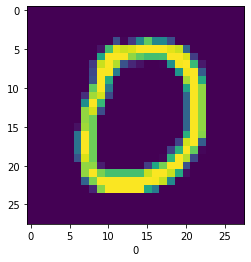

In [35]:
plot_image(X_test, y_pred, 10)

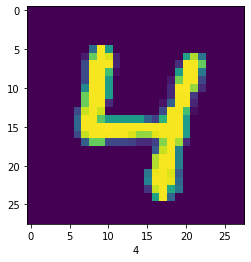

In [36]:
plot_image(X_test, y_pred, 56)

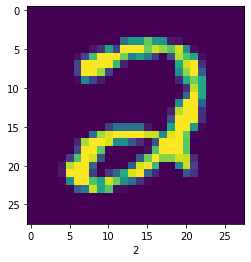

In [37]:
plot_image(X_test, y_pred, 106)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.98      0.99      0.98      1032
           3       0.97      1.00      0.98      1010
           4       0.98      0.99      0.99       982
           5       1.00      0.98      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.98      0.99      0.98       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Text(69.0, 0.5, 'Truth')

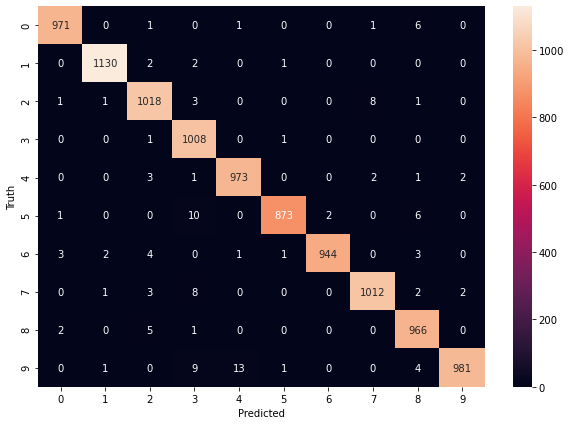

In [44]:
cm = tf.math.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [45]:
model.save("model")

INFO:tensorflow:Assets written to: model\assets
